# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import requests

In [2]:
browser = Browser('chrome')

DriverNotFoundError: Driver for chrome was not found.

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find('table', class_='table')


In [5]:
# Extract all rows of data
headers = [header.text for header in table.find_all('th')]
rows = []
for row in table.find_all('tr')[1:]:
    rows.append([cell.text for cell in row.find_all('td')])

# Create a DataFrame from the scraped data
df = pd.DataFrame(rows, columns=headers)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
data_rows = []

# Convert data types
# Extract the rows of data
for row in table.find_all('tr')[1:]:
    # Extract each cell in the row
    cells = [cell.text.strip() for cell in row.find_all('td')]
    # Convert to appropriate types
    id_val = int(cells[0])
    terrestrial_date = pd.to_datetime(cells[1])
    sol = int(cells[2])
    ls = float(cells[3])
    month = int(cells[4])
    min_temp = float(cells[5])
    pressure = float(cells[6])

# Display the DataFrame
 data_rows.append({
        'id': id_val,
        'terrestrial_date': terrestrial_date,
        'sol': sol,
        'ls': ls,
        'month': month,
        'min_temp': min_temp,
        'pressure': pressure
    })

# Loop through the scraped data to create a list of rows


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)

In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
df = pd.DataFrame(data_rows, columns=headers)

NameError: name 'data_rows' is not defined

In [9]:
# Confirm DataFrame was created successfully
print(df.head())


   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# Change data types for data analysis
df['id'] = df['id'].astype(object)
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
print(df.head())

   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0


### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"There are {num_months} months on Mars.")

There are 12 months on Mars.


In [14]:
# 2. How many Martian days' worth of data are there?
num_sols = df['sol'].nunique()
print(f"There are {num_sols} Martian days worth of data in the dataset.")

There are 1867 Martian days worth of data in the dataset.


In [23]:
# 3. What is the average low temperature by month?
# Group the data by month and calculate the average low temperature
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

# Display the average minimum temperature by month
print(avg_min_temp_by_month)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


In [24]:
# Plot the average temperature by month
# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (C)')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xticks(rotation=0)
plt.show(

SyntaxError: incomplete input (349306458.py, line 9)

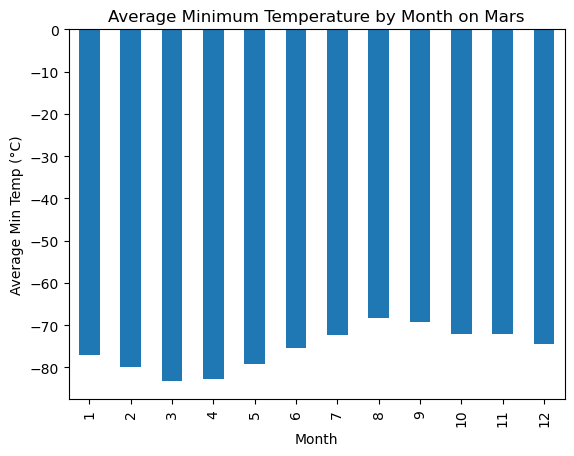

The coldest month on Mars is month 3.
The warmest month on Mars is month 8.


In [17]:
# Identify the coldest and hottest months in Curiosity's location
# Group by month and calculate the average minimum temperature
avg_min_temp = df.groupby('month')['min_temp'].mean()

# Plot the results as a bar chart
avg_min_temp.plot(kind='bar', title='Average Minimum Temperature by Month on Mars', xlabel='Month', ylabel='Average Min Temp (°C)')
plt.show()

coldest_month = avg_min_temp.idxmin()
warmest_month = avg_min_temp.idxmax()
print(f"The coldest month on Mars is month {coldest_month}.")
print(f"The warmest month on Mars is month {warmest_month}.")


In [27]:
# 4. Average pressure by Martian month
# Group by month and calculate the average pressure
avg_pressure = df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

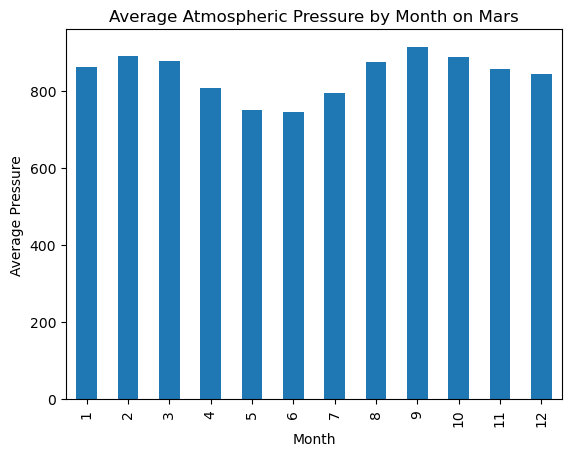

The month with the lowest atmospheric pressure on Mars is month 6.
The month with the highest atmospheric pressure on Mars is month 9.


In [30]:
# Plot the average pressure by month

# Plot the results as a bar chart
avg_pressure.plot(kind='bar', title='Average Atmospheric Pressure by Month on Mars', xlabel='Month', ylabel='Average Pressure')
plt.show()

lowest_pressure_month = avg_pressure.idxmin()
highest_pressure_month = avg_pressure.idxmax()
print(f"The month with the lowest atmospheric pressure on Mars is month {lowest_pressure_month}.")
print(f"The month with the highest atmospheric pressure on Mars is month {highest_pressure_month}.")


There are about 2021.0 terrestrial days in a Martian year.


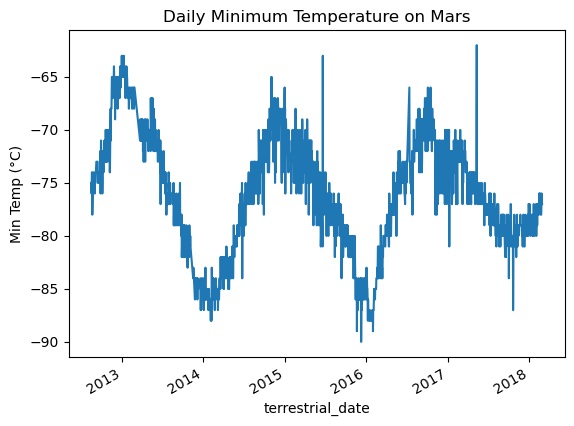

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Calculate the number of terrestrial days in a Martian year
# One Martian year is 687 Earth days
terrestrial_days_in_martian_year = df['terrestrial_date'].diff().dt.days.cumsum().max()
print(f"There are about {terrestrial_days_in_martian_year} terrestrial days in a Martian year.")

# Plot daily minimum temperature to visually estimate the result
df.set_index('terrestrial_date')['min_temp'].plot(title='Daily Minimum Temperature on Mars', ylabel='Min Temp (°C)')
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
# Export the DataFrame to a CSV file
df.to_csv('mars_weather.csv', index=False)


In [22]:
browser.quit()

NameError: name 'browser' is not defined